In [2]:
from dataset import Trad_ml_DataSet
from cnn_n2o_pretrain import CNN
from gru_n2o_pretrain import GRU
from lstm_n2o_pretrain import LSTM
from transformer_n2o_pretrain import Transformer
from mlp_n2o_pretrain import MLP
import torch

In [3]:
# paths
data_path = './data/'
input_data = 'input16_output5_pretrain_18yr.sav'
output_path = "./gru_test_results/"
sample_index_file = 'n2o_sample_index.sav'
output_model = 'n2o_trad_ml.sav'
scaler_file = 'input16_output5_scalers.sav'

# optimization parameters
learning_rate = 0.001
num_epochs = 500

# model parameters
hidden_dim = 64
num_layers = 2

In [ ]:
dataset = Trad_ml_DataSet(data_path=data_path, scaler_file=scaler_file,
                            input_data=input_data,
                            out_path=output_path)

ml_model = GRU(input_path=data_path, output_path=output_path, 
        input_data=input_data, output_model=output_model, 
        dataset=dataset, hidden_dim=hidden_dim, num_layers=num_layers)
    
dataset.print_dataset_info()

ml_model.train_step(learning_rate=learning_rate, num_epochs=num_epochs)  
ml_model.test()


Data loaded, shape: (99, 18, 365, 21)
torch.Size([99, 18, 365, 16]) torch.Size([99, 18, 365, 5])
Training-validation split completed
Train X shape: torch.Size([83, 18, 365, 16]), Val X shape: torch.Size([16, 18, 365, 16])
Train Y shape: torch.Size([83, 18, 365, 5]), Val Y shape: torch.Size([16, 18, 365, 5])
Using: cuda

==== Dataset Information ====
Data path: ./data/
Total years: 18, Days per year: 365
Number of input features: 16, Number of output features: 5
Strat training
GRUNetwork(
  (gru_layer): GRU(16, 64, num_layers=2, batch_first=True)
  (relu1): ReLU()
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (relu2): ReLU()
  (fc2): Linear(in_features=64, out_features=5, bias=True)
)
Epoch 1/500, Train Loss: 4.4991, Val Loss: 4.2813, Train Loss Components: [0.9050, 0.9473, 0.9969, 0.9402, 0.7098]
Epoch 2/500, Train Loss: 4.3061, Val Loss: 4.0739, Train Loss Components: [0.8945, 0.8562, 0.9844, 0.8667, 0.7042]
Epoch 3/500, Train Loss: 3.9489, Val Loss: 3.7745, Train Loss

Loss vis saved


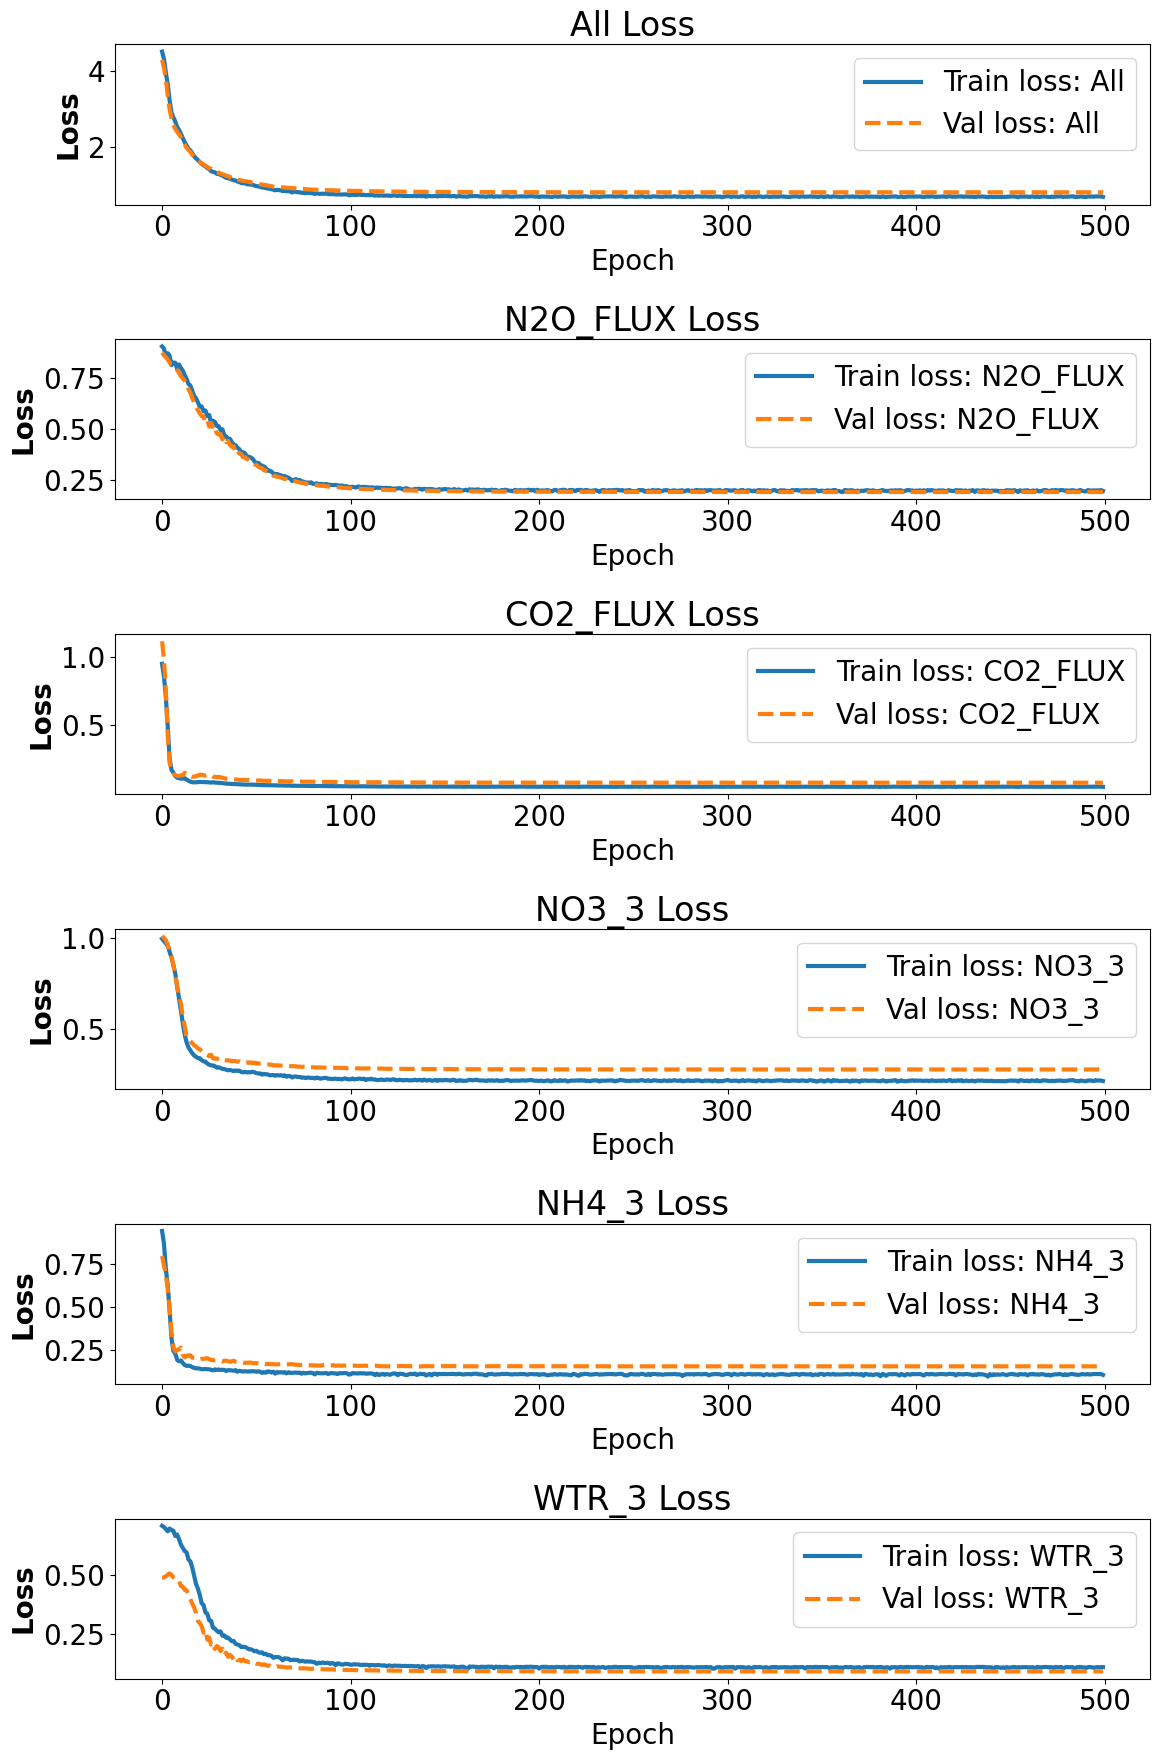

Flux vis saved


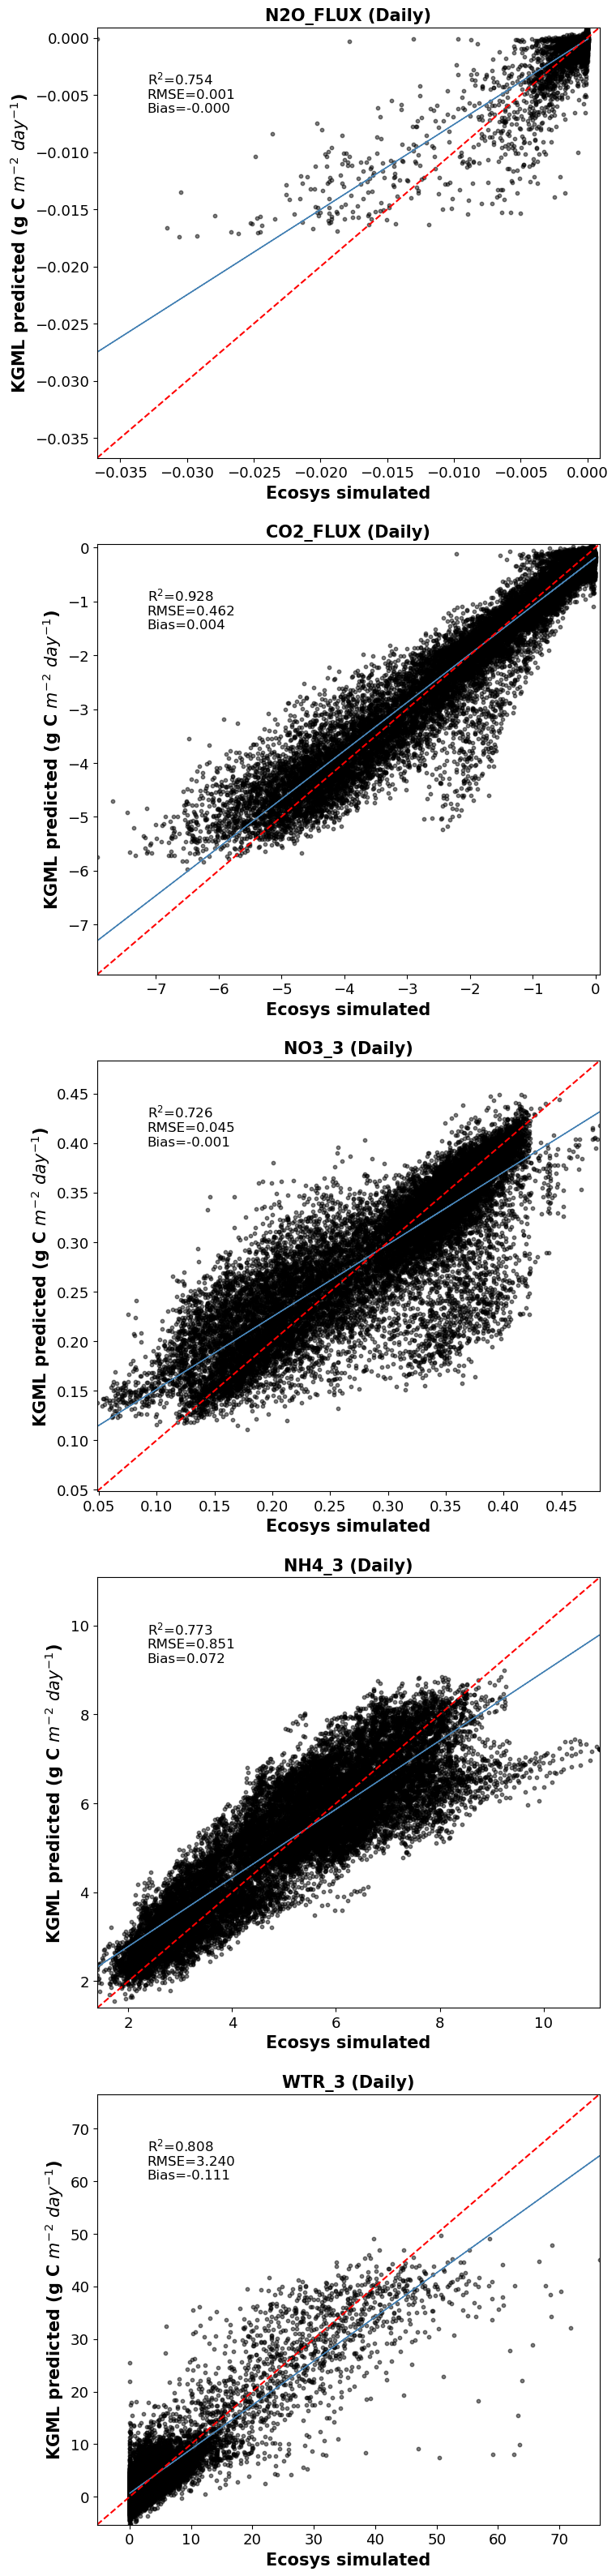

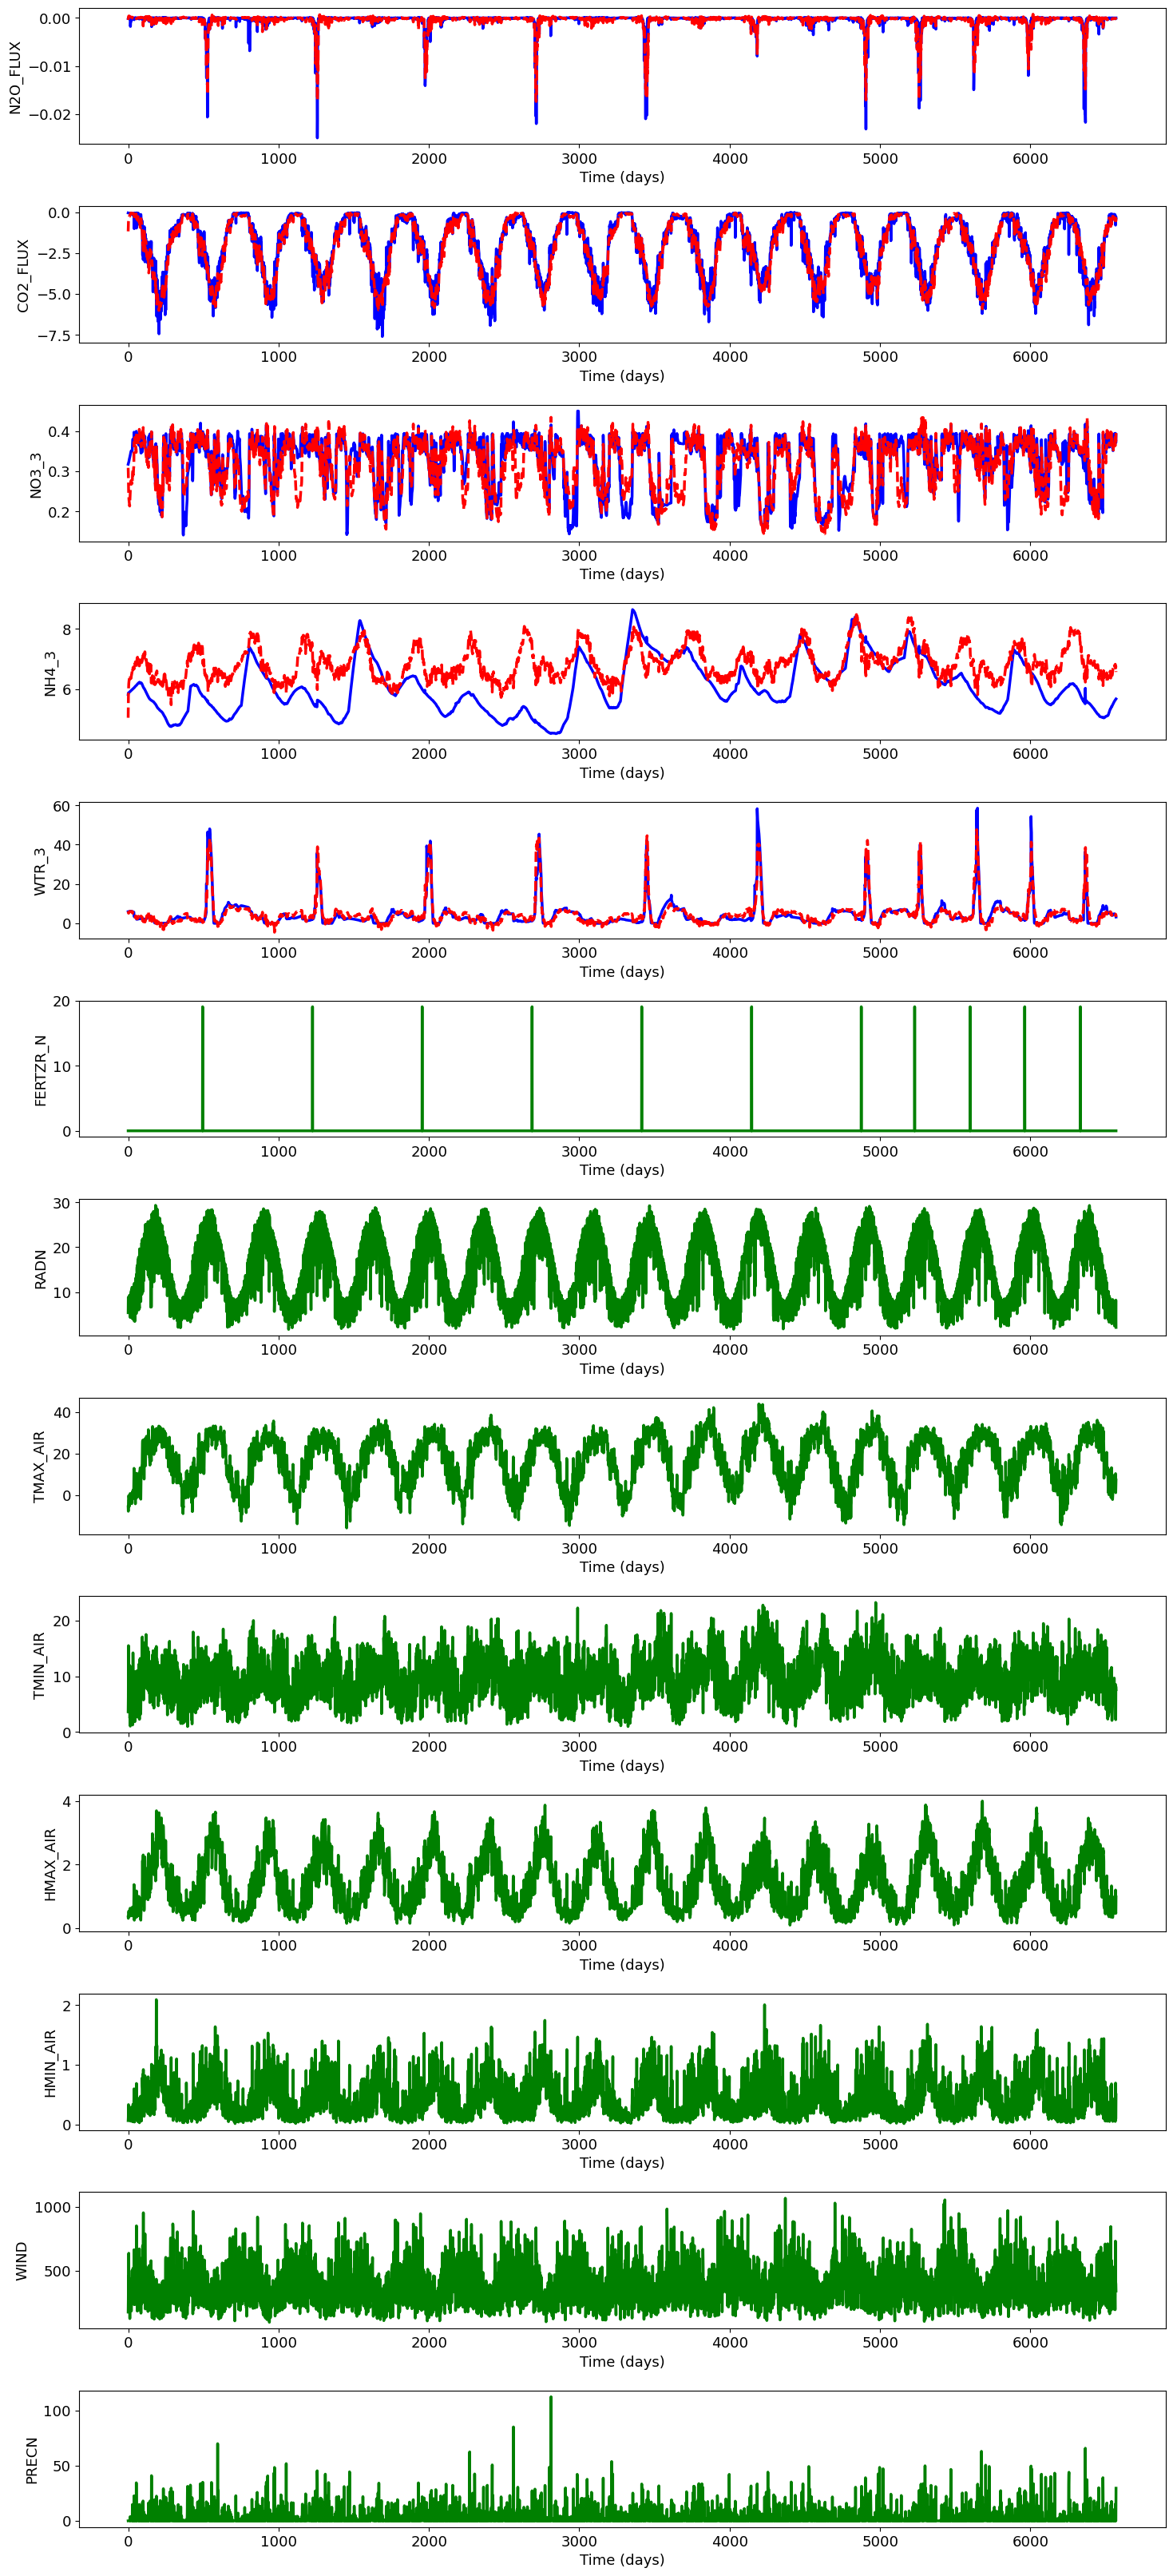

Time series vis saved


In [8]:
ml_model.vis_loss()  
ml_model.vis_flux()
ml_model.vis_data_time_series()